In [ ]:
'''
The script automates the process of sentiment analysis and provides visual insights into the sentiment 
trends and distributions within the dataset. Thisn script was run for all years. 
'''

In [334]:
# Importing necessary libraries 

import pandas as pd
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt


In [335]:
# Loading 2010 cleaned dataset 
df = pd.read_csv('/Users/rachelgupta/Desktop/NAACP - PIT NE/pitne-bias-in-media/summer24/notebooks/Rachel/2010-19 datasets/2019_final.csv')

In [336]:
# Examining full dataset without truncation 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [337]:
# Ensuring the 'body' column is string datatype 
df['body'] = df['body'].astype(str)

In [313]:
'''
nlp = spacy.load('en_core_web_sm')

# Function to extract sentences surrounding the neighborhood entity
def extract_sentences(text, neighborhood):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents if neighborhood in sent.text]
    return ' '.join(sentences)

# Apply the function to extract sentences containing the neighborhood
df['Sentences'] = df.apply(lambda row: extract_sentences(row['body'], row['Neighborhood']), axis=1)
'''

"\nnlp = spacy.load('en_core_web_sm')\n\n# Function to extract sentences surrounding the neighborhood entity\ndef extract_sentences(text, neighborhood):\n    doc = nlp(text)\n    sentences = [sent.text for sent in doc.sents if neighborhood in sent.text]\n    return ' '.join(sentences)\n\n# Apply the function to extract sentences containing the neighborhood\ndf['Sentences'] = df.apply(lambda row: extract_sentences(row['body'], row['Neighborhood']), axis=1)\n"

In [338]:
# Droping irrelevant columns 
df_2010 = df.drop(columns=['llama_prediction', 'Explicit_Pass_1', 'NER_Pass_1','NER_Pass_1_Sorted', 
                            'NER_Pass_1_Coordinates','NER_prediction', 'tract','Calculated_Tract', 
                            'actual_body_word_count', 'indexing_terms','pub_date', 'Unnamed: 0', 
                            'NER_Sorted','lede','body_cleaned','hl1_y','NER_Sorted_Coordinates', 'hl2', 'T_White alone',
                            'T_Black or African American alone' ,	'T_American Indian and Alaska Native alone', 
                            'T_Asian alone' , 'T_Native Hawaiian and Other Pacific Islander alone'	, 
                            'T_Some Other Race alone' , 'T_Population of two or more races'	,
                            'T_Total Hispanic or Latino origin' , 'T_Not Hispanic or Latino' ,	'T_Hispanic or Latino'	, 'T_majority_race'])

In [339]:

# Function to analyze the sentiment of the text in each article 
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying the sentiment analysis function to the 'body' column
df_2010['Sentiment'] = df_2010['body'].apply(analyze_sentiment)

# Displaying the DataFrame with the new Sentiment column
df_2010[['body', 'Sentiment']].head()

,body,Sentiment
0,body over time and through his consistency as ...,0.176838
1,body we are rooting against boston wrote mike ...,-0.023534
2,body amy latimer president of the delaware nor...,0.094466
3,body if you re asking what the super well then...,0.117534
4,body montreal 32 15 11 36 13 104 105 tampa bay...,0.114545


In [349]:
# Droping missing values 
df_2010 = df_2010.dropna()

In [317]:
# Converting dataset to a csv file 
df_2010.to_csv('sentiment_2016.csv', index=False)

In [319]:
# Calculating mean sentiment score for each section
mean_sentiment_by_section = df_2010.groupby('position_section')['Sentiment'].mean().reset_index()

# Renaming the column 
mean_sentiment_by_section.rename(columns={'Sentiment': 'Mean_Sentiment_Section'}, inplace=True)

# Displaying result
mean_sentiment_by_section.head()



,position_section,Mean_Sentiment_Section
0,BUSINESS,0.097017
1,EDITORIAL OPINION,0.098771
2,LIVING ARTS,0.145379
3,MAGAZINE,0.145897
4,NEWS,0.091129


In [320]:
# Merging with the original DataFrame
df_2010 = df_2010.merge(mean_sentiment_by_section, on='position_section', how='left')

In [321]:
mean_sentiment_by_section

,position_section,Mean_Sentiment_Section
0,BUSINESS,0.097017
1,EDITORIAL OPINION,0.098771
2,LIVING ARTS,0.145379
3,MAGAZINE,0.145897
4,NEWS,0.091129
5,REALESTATE,0.097483
6,SPORTS,0.092202
7,SUNDAY,0.163021


In [322]:
# Calculating mean sentiment score for each neighborhood
mean_sentiment_by_neighborhood = df_2010.groupby('Neighborhood')['Sentiment'].mean().reset_index()

# Renaming the column 
mean_sentiment_by_neighborhood.rename(columns={'Sentiment': 'Mean_Sentiment_Neighborhood'}, inplace=True)

# Displaying result 
mean_sentiment_by_neighborhood.head()

,Neighborhood,Mean_Sentiment_Neighborhood
0,Allston,0.051274
1,Back Bay,0.130111
2,Beacon Hill,0.106148
3,Brighton,0.105222
4,Charlestown,0.093031


In [323]:
# Merging with the original DataFrame
df_2010 = df_2010.merge(mean_sentiment_by_neighborhood, on='Neighborhood', how='left')

In [324]:
# Droping columns 
df_2010 = df_2010.drop(columns=['hl1_x', 'body', 'author', 'T_Total'])

In [325]:
df_2010.head()

,position_section,position_subsection,year,longitude,latitude,Tract,Article_Count,Neighborhood,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander",Other Races or Multiple Races,majority_race,Sentiment,Mean_Sentiment_Section,Mean_Sentiment_Neighborhood
0,SPORTS,unknown,2019.0,-71.062146,42.366198,20303.0,345.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone,0.176838,0.092202,0.080783
1,SPORTS,unknown,2019.0,-71.062146,42.366198,20303.0,345.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone,-0.023534,0.092202,0.080783
2,NEWS,Metro,2019.0,-71.062146,42.366198,20303.0,345.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone,0.094466,0.091129,0.080783
3,SPORTS,unknown,2019.0,-71.062146,42.366198,20303.0,345.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone,0.117534,0.092202,0.080783
4,SPORTS,unknown,2019.0,-71.062146,42.366198,20303.0,345.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone,0.114545,0.092202,0.080783


In [326]:
# Inserting the year column as the first column in the dataset 
column_to_move = df_2010.pop('year')
df_2010.insert(0, 'year', column_to_move)

In [327]:
df_2010.head()

,year,position_section,position_subsection,longitude,latitude,Tract,Article_Count,Neighborhood,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander",Other Races or Multiple Races,majority_race,Sentiment,Mean_Sentiment_Section,Mean_Sentiment_Neighborhood
0,2019.0,SPORTS,unknown,-71.062146,42.366198,20303.0,345.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone,0.176838,0.092202,0.080783
1,2019.0,SPORTS,unknown,-71.062146,42.366198,20303.0,345.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone,-0.023534,0.092202,0.080783
2,2019.0,NEWS,Metro,-71.062146,42.366198,20303.0,345.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone,0.094466,0.091129,0.080783
3,2019.0,SPORTS,unknown,-71.062146,42.366198,20303.0,345.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone,0.117534,0.092202,0.080783
4,2019.0,SPORTS,unknown,-71.062146,42.366198,20303.0,345.0,West End,4933.0,338.0,613.0,1440.0,381.0,White alone,0.114545,0.092202,0.080783


In [330]:
# Converting dataframe to csv file 
df_2010.to_csv('mean_sentiment_2019.csv', index=False)

In [49]:
# Find the highest and lowest mean sentiment score for neighborhoods
highest_mean_sentiment_neighborhood = mean_sentiment_by_neighborhood.loc[mean_sentiment_by_neighborhood['Mean_Sentiment_Neighborhood'].idxmax()]
lowest_mean_sentiment_neighborhood = mean_sentiment_by_neighborhood.loc[mean_sentiment_by_neighborhood['Mean_Sentiment_Neighborhood'].idxmin()]

In [50]:
lowest_mean_sentiment_neighborhood

Neighborhood                    Allston
Mean_Sentiment_Neighborhood    0.051274
Name: 0, dtype: object

In [51]:
highest_mean_sentiment_neighborhood

Neighborhood                    Roxbury
Mean_Sentiment_Neighborhood    0.130272
Name: 16, dtype: object

In [52]:
# Find the highest and lowest mean sentiment score for sections
highest_mean_sentiment_section = mean_sentiment_by_section.loc[mean_sentiment_by_section['Mean_Sentiment_Section'].idxmax()]
lowest_mean_sentiment_section = mean_sentiment_by_section.loc[mean_sentiment_by_section['Mean_Sentiment_Section'].idxmin()]

In [53]:
lowest_mean_sentiment_section

position_section              NEWS
Mean_Sentiment_Section    0.091129
Name: 4, dtype: object

In [54]:
highest_mean_sentiment_section

position_section            SUNDAY
Mean_Sentiment_Section    0.163021
Name: 7, dtype: object

In [363]:
# laoding dataset with mean sentiment scores for all years for visualizations
df3 = pd.read_csv('/Users/rachelgupta/Desktop/NAACP - PIT NE/pitne-bias-in-media/summer24/notebooks/Rachel/mean_sentimentscore_df.csv')

In [364]:
df3.head()

,year,position_section,position_subsection,longitude,latitude,Tracts,Article_Count,Neighborhood,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander",Other Races or Multiple Races,majority_race,Sentiment,Mean_Sentiment_Section,Mean_Sentiment_Neighborhood
0,2010.0,BUSINESS,unknown,-71.118563,42.362780,803.0,35.0,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone,0.019024,0.081353,0.083669
1,2010.0,G,Living Arts,-71.118116,42.360262,803.0,35.0,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone,0.169098,0.164853,0.083669
2,2010.0,SPORTS,unknown,-71.117705,42.352197,803.0,35.0,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone,-0.016051,0.106107,0.083669
3,2010.0,NEWS,Metro,-71.119302,42.356444,803.0,35.0,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone,-0.084649,0.076112,0.083669
4,2010.0,BUSINESS,unknown,-71.118563,42.362780,803.0,35.0,Allston,12536.0,1326.0,3259.0,6271.0,1512.0,White alone,-0.024444,0.081353,0.083669


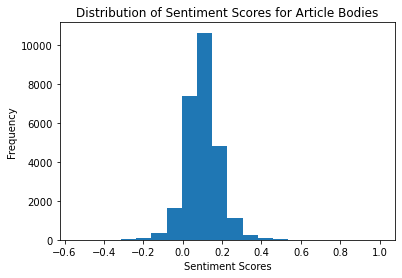

In [368]:
# Plotting the distribution of sentiment scores for article bodies using a histogram

plt.hist(df3['Sentiment'], bins=20)
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores for Article Bodies')
plt.show()

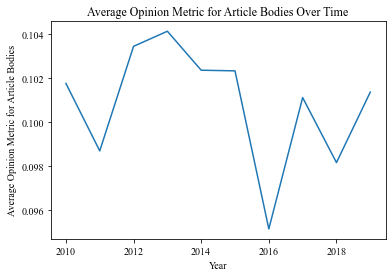

In [369]:
# Calculating the average sentiment score for article bodies by year
avg_body_sentiment_by_year = df3.groupby('year')['Sentiment'].mean()
plt.rcParams['font.family'] = 'Times New Roman'

# Plotting the average sentiment score over time
avg_body_sentiment_by_year.plot()
plt.xlabel('Year')
plt.ylabel('Average Opinion Metric for Article Bodies')
plt.title('Average Opinion Metric for Article Bodies Over Time')
plt.show()